# Assignment III

You can work on this assignment on your own or in pairs. 

I would like you to be a bit creative with this last one, I will give you a suggested list, but feel free to add some extra analysis! Data science is never a rutine or a standard procedure ;)

- Pick a meaningful dataset for you
- **Briefly** summarize what it contains
- Test at least 3 hypothesis. Define them previously, writing down H0 and H1, your significance level and confidence. Would be nice if you use different tests. Extra points if the tests are interesting ;)
- Pick two numerical variables and adjust a linear model between them. Show the plot and describe what can be said about the model ($R^2$, coefficients, significance...). I don't want the variables to be perfectly correlated, I want the explanation to be right and clear. It is fine if the model is a disaster.
- Adjust a new model with at least 2 independent variables. One of them should be categorical and the other one numerical. Give a meaningful interpretation of the model. Does it increase its performance against the simple regression one? How?

Be visual please! Think about this assignment more like a business report rather than a university activity.

Some suggested sources for datasets:

- https://www.kaggle.com/datasets?fileType=csv&sizeEnd=50%2CMB
- https://piktochart.com/blog/100-data-sets/
- https://towardsdatascience.com/all-the-datasets-you-need-to-practice-data-science-skills-and-make-a-great-portfolio-857a348883b5
- https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P4-Demographic-Data.csv

or...

In [93]:
%config IPCompleter.greedy=True
%load_ext memory_profiler
%matplotlib inline
%run Assignment_III_Helper.ipynb
%run Assignment_III_Plot.ipynb

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


## First dataset - Hypothesis 1

In [2]:
kaggle_path = "letmewin97/coronavirus-tweets"
kaggle_path_Name = "Corona.csv"
kaggle_zip_file = True
kaggle_dataset_download(kaggle_path, kaggle_path_Name, kaggle_zip_file)

In [3]:
dfCoronaTweets = pd.read_csv(r'Corona.csv/Corona.csv')

In [4]:
dfCoronaTweets.head(3)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive


### Descriptive analysis

In [5]:
dfCoronaTweets.shape

(41157, 6)

In [6]:
#Checking out nulls: Location is not clean at all!
get_nulls_data(dfCoronaTweets)

,Total,PercNotNull
Location,8590,79.13
Sentiment,0,100.00
OriginalTweet,0,100.00
TweetAt,0,100.00
ScreenName,0,100.00
UserName,0,100.00


In [7]:
dfCoronaTweets['TweetAt']= dfCoronaTweets['TweetAt'].astype('datetime64[ns]')

In [8]:
dfCoronaTweets.dtypes

UserName                  int64
ScreenName                int64
Location                 object
TweetAt          datetime64[ns]
OriginalTweet            object
Sentiment                object
dtype: object

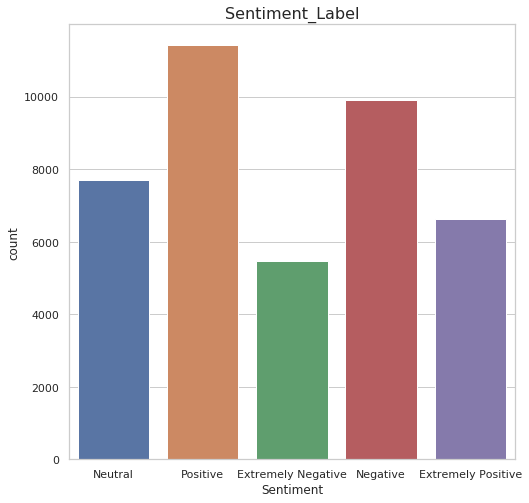

In [9]:
count_categorical(dfCoronaTweets, 'Sentiment', 'Sentiment_Label')

In [10]:
dfCoronaTweets_dummy = pd.get_dummies(dfCoronaTweets['Sentiment'])
dfCoronaTweets_dummy.shape

(41157, 5)

In [11]:
dfCoronaTweets_dummy.head(3)

,Extremely Negative,Extremely Positive,Negative,Neutral,Positive
0,0,0,0,1,0
1,0,0,0,0,1
2,0,0,0,0,1


In [12]:
dfCoronaTweets_concat = pd.concat([dfCoronaTweets, dfCoronaTweets_dummy], axis=1)
dfCoronaTweets_concat.shape

(41157, 11)

In [13]:
#dfCoronaTweets_concat['TweetAt']= dfCoronaTweets_concat['TweetAt'].astype('datetime64[ns]')

In [14]:
#dfCoronaTweets_concat.dtypes

In [15]:
dfCoronaTweets_concat.head(3)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Extremely Negative,Extremely Positive,Negative,Neutral,Positive
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0,0,0,1,0
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,0,0,0,0,1
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,0,0,0,0,1


In [16]:
dfCoronaTweets_gr =  dfCoronaTweets_concat.groupby("TweetAt")['Extremely Negative', 'Extremely Positive', 'Negative', 'Neutral', 'Positive'].sum()
dfCoronaTweets_gr.reset_index(inplace=True)
dfCoronaTweets_gr.shape

(30, 6)

In [17]:
dfCoronaTweets_gr.head(3)

,TweetAt,Extremely Negative,Extremely Positive,Negative,Neutral,Positive
0,2020-01-04,90.0,89.0,156.0,125.0,170.0
1,2020-02-04,119.0,141.0,242.0,201.0,251.0
2,2020-03-04,103.0,117.0,208.0,154.0,228.0


In [18]:
dfCoronaTweets_gr_melt = pd.melt(dfCoronaTweets_gr,id_vars=['TweetAt'], value_vars=['Extremely Negative', 'Extremely Positive', 'Negative', 'Neutral', 'Positive'],
                           var_name = "evaluation", value_name = "count")
dfCoronaTweets_gr_melt.shape

(150, 3)

In [19]:
dfCoronaTweets_gr_melt.head(3)

,TweetAt,evaluation,count
0,2020-01-04,Extremely Negative,90.0
1,2020-02-04,Extremely Negative,119.0
2,2020-03-04,Extremely Negative,103.0


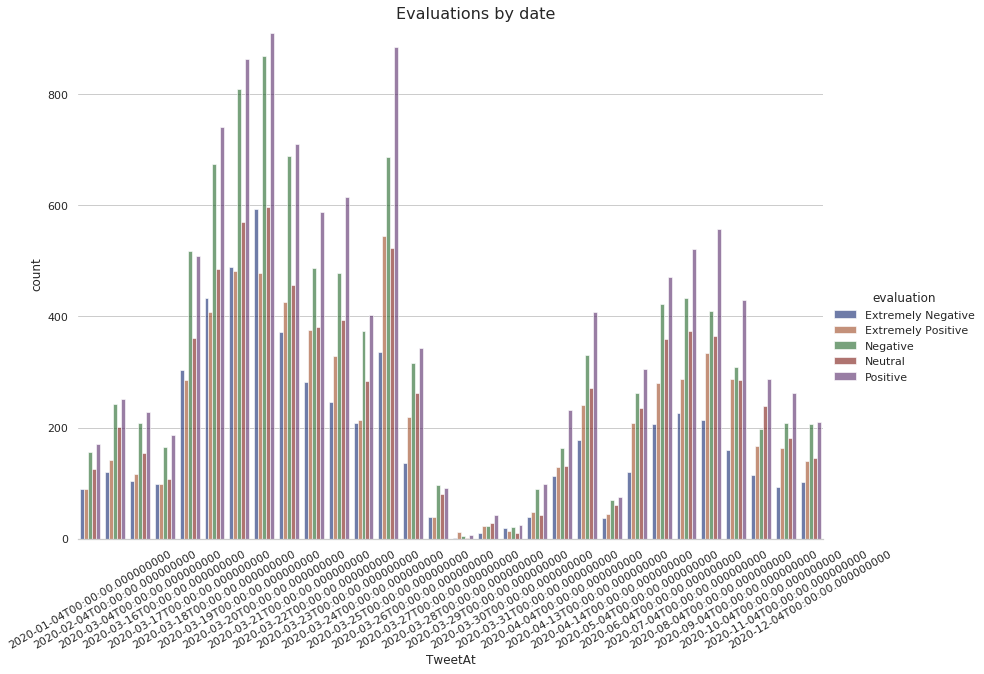

In [96]:
categorical_plot(df=dfCoronaTweets_gr_melt, p_kind="bar", p_x="TweetAt", p_y="count", 
                 p_hue ="evaluation", p_ci="sd", p_palette="dark", p_alpha=.6, 
                 p_height=8, p_sub_title = "Evaluations by date")

In [21]:
#pd.isnull(dfCoronaTweets_gr_melt)
dfCoronaTweets_gr_melt.isnull().values.any()

False

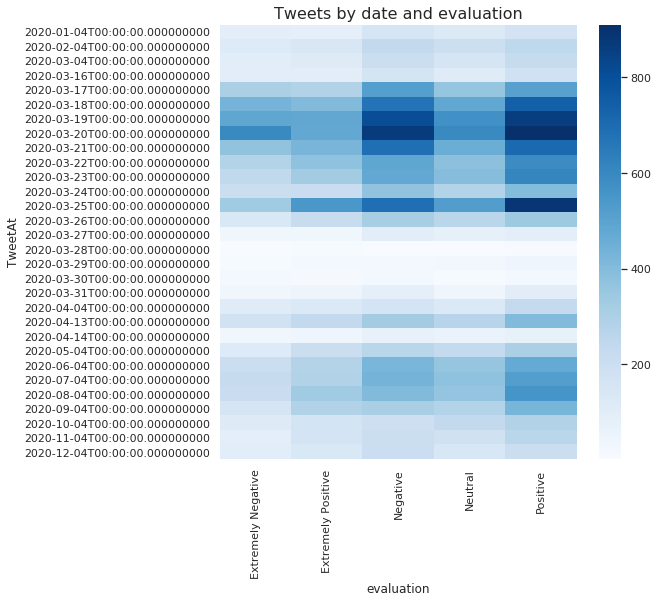

In [157]:
dfCoronaTweets_gr_melt_pivot = dfCoronaTweets_gr_melt.pivot('TweetAt','evaluation','count')
pivot_heatmap(df=dfCoronaTweets_gr_melt_pivot, p_annot=False, p_cmap="Blues", p_ax_title="Tweets by date and evaluation")

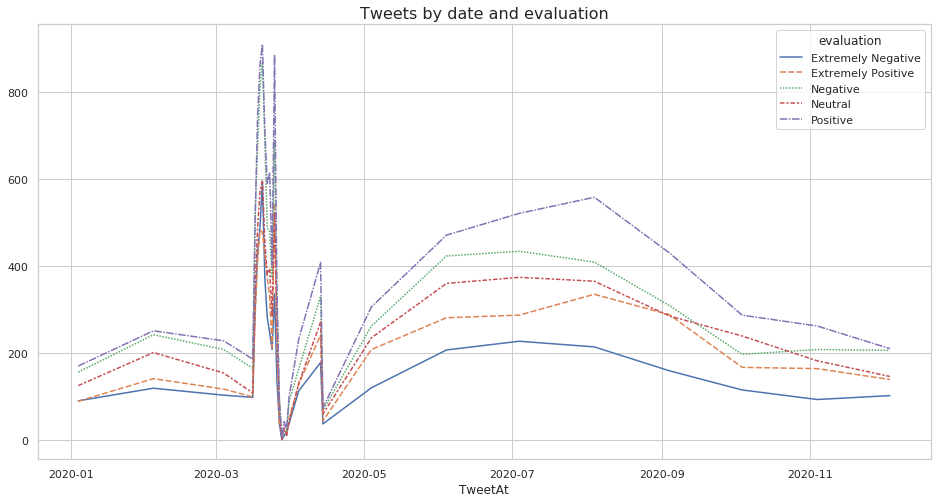

In [23]:
pivot_lineplot(dfCoronaTweets_gr_melt_pivot, "Tweets by date and evaluation")

In [24]:
#dfCoronaTweets_gr_loc =  dfCoronaTweets_concat.groupby("Location").sum()
#dfCoronaTweets_gr_loc

### Hypothesis 1: Average perception difference in first semester versus second semester of the year

#### Population we have

In [25]:
dfCoronaTweets.shape

(41157, 6)

In [26]:
#I decided to create my own compound index, based on a simple scale [-1, 1]
dfCoronaTweets['compound_index'] = dfCoronaTweets.apply (lambda row: get_compound_acceptance_index(row), axis=1)
dfCoronaTweets.head(3)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,compound_index
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0.0
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,0.5
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,0.5


In [27]:
dfCoronaTweets_first_sem = dfCoronaTweets[dfCoronaTweets['TweetAt'] < '2020-07-01']
dfCoronaTweets_first_sem.shape

(33245, 7)

In [28]:
dfCoronaTweets_second_sem = dfCoronaTweets[dfCoronaTweets['TweetAt'] > '2020-06-30']
dfCoronaTweets_second_sem.shape

(7912, 7)

In [29]:
dfCoronaTweets_first_sem.head(3)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,compound_index
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0.0
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,0.5
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,0.5


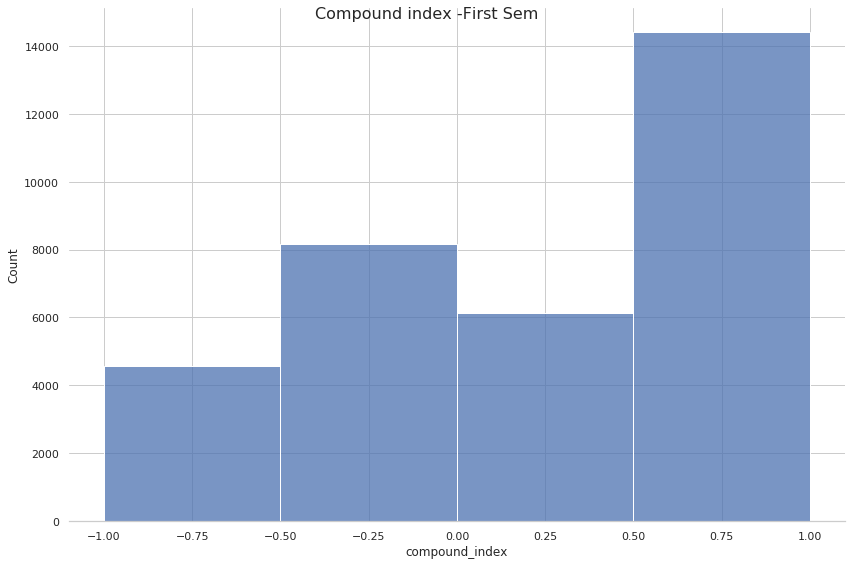

In [30]:
custom_displot(dfCoronaTweets_first_sem, p_x="compound_index", p_bins=[-1, -0.5, 0, 0.5, 1], p_discrete = True, p_height=8, p_ax_title = "Compound index -First Sem")

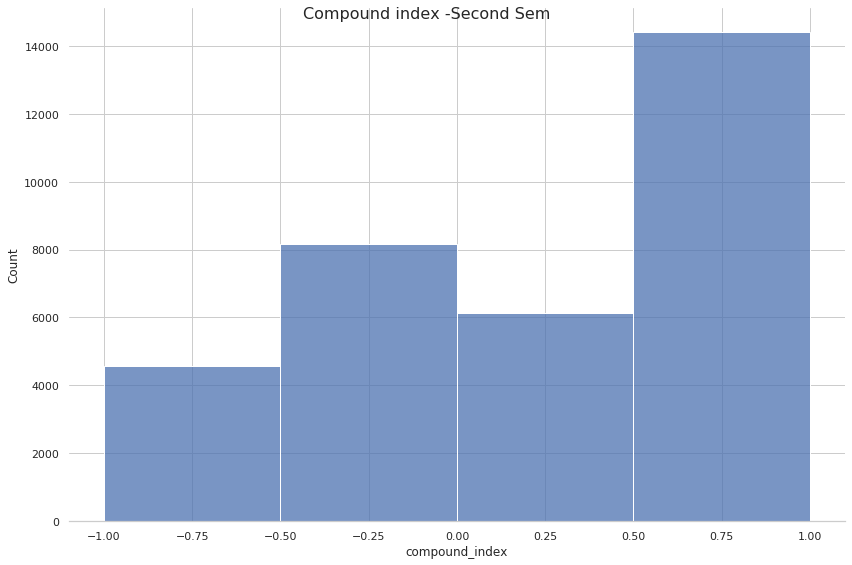

In [31]:
custom_displot(dfCoronaTweets_first_sem, p_x="compound_index", p_bins=[-1, -0.5, 0, 0.5, 1], p_discrete = True, p_height=8, p_ax_title = "Compound index -Second Sem")

In [32]:
#sns.set(style="whitegrid")

# Initialize the matplotlib figure
#f, ax = plt.subplots(figsize=(8, 8))
#sns.boxplot(x="Sentiment", y="compound_index", data=dfCoronaTweets_second_sem)
#sns.stripplot(x="Sentiment", y="compound_index", data=dfCoronaTweets_second_sem, color=".25")
#plt.title('Class - fare price distribution')
#plt.show()

In [33]:
first_sem_mean = dfCoronaTweets_first_sem["compound_index"].mean()
second_sem_mean = dfCoronaTweets_second_sem["compound_index"].mean()

print('First semester mean: {}'.format(first_sem_mean))
print('Second semester mean: {}'.format(second_sem_mean))

First semester mean: 0.035283501278387724
Second semester mean: 0.09131698685540951


In [34]:
first_sem_std = dfCoronaTweets_first_sem.loc[:,"compound_index"].std()
second_sem_std = dfCoronaTweets_second_sem.loc[:,"compound_index"].std()

print('First semester std: {}'.format(first_sem_std))
print('Second semester std: {}'.format(second_sem_std))

First semester std: 0.6512719165471448
Second semester std: 0.6391529002573112


#### getting sample from both DFs

In [35]:
dfCoronaTweets_first_sem = dfCoronaTweets_first_sem.sample(frac=0.5, replace=False, random_state=1)
dfCoronaTweets_first_sem.shape

(16622, 7)

In [36]:
dfCoronaTweets_second_sem = dfCoronaTweets_second_sem.sample(frac=0.5, replace=False, random_state=1)
dfCoronaTweets_second_sem.shape

(3956, 7)

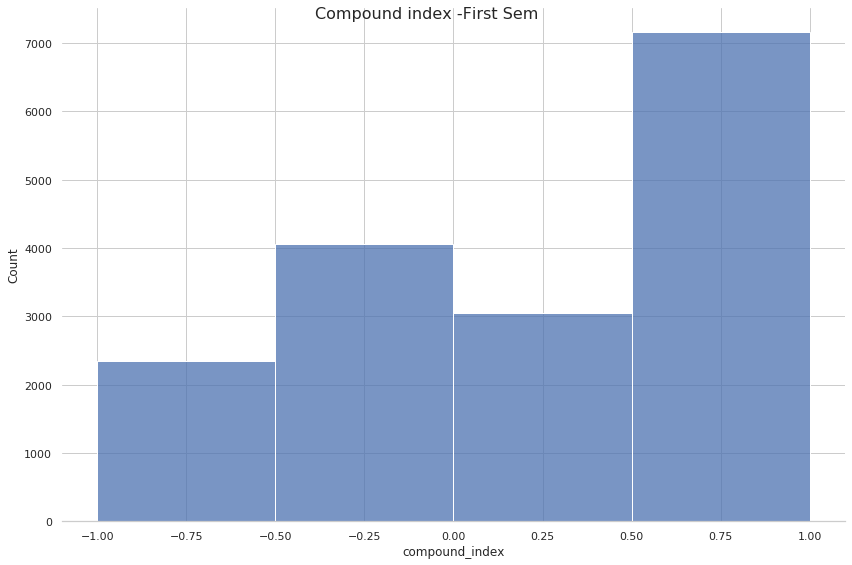

In [37]:
custom_displot(dfCoronaTweets_first_sem, p_x="compound_index", p_bins=[-1, -0.5, 0, 0.5, 1], p_discrete = True, p_height=8, p_ax_title = "Compound index -First Sem")

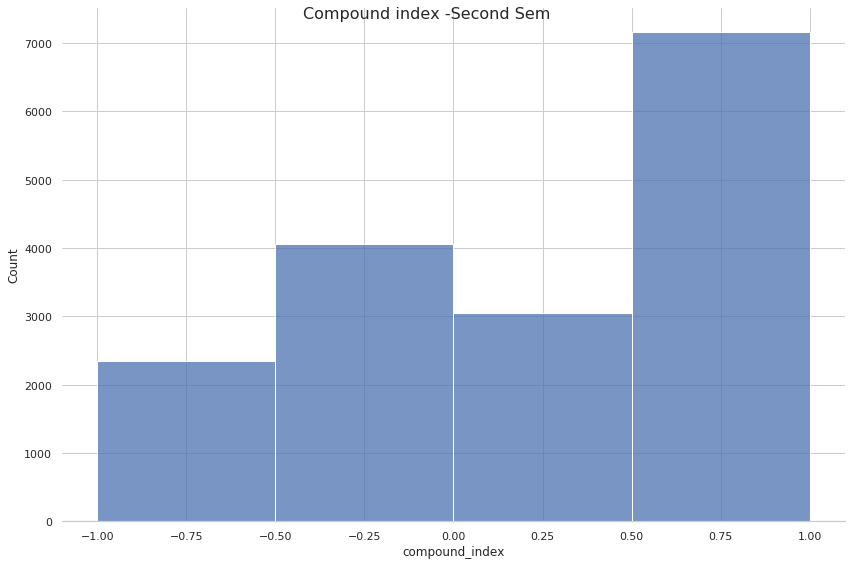

In [38]:
custom_displot(dfCoronaTweets_first_sem, p_x="compound_index", p_bins=[-1, -0.5, 0, 0.5, 1], p_discrete = True, p_height=8, p_ax_title = "Compound index -Second Sem")

In [39]:
first_sem_mean = dfCoronaTweets_first_sem["compound_index"].mean()
second_sem_mean = dfCoronaTweets_second_sem["compound_index"].mean()

print('First semester mean: {}'.format(first_sem_mean))
print('Second semester mean: {}'.format(second_sem_mean))

First semester mean: 0.03164480808566959
Second semester mean: 0.09567745197168857


In [40]:
first_sem_std = dfCoronaTweets_first_sem.loc[:,"compound_index"].std()
second_sem_std = dfCoronaTweets_second_sem.loc[:,"compound_index"].std()

print('First semester std: {}'.format(first_sem_std))
print('Second semester std: {}'.format(second_sem_std))

First semester std: 0.6542201623873477
Second semester std: 0.6389261068542247


### T-test for the means of two independent samples of scores.

In [41]:
#The recall:
# I know the equal_var = True will perform Welch’s t-test, which does not assume equal population variance.
# if the sample size is sufficiently large, a t-test will work even if the population is not approximately normally distributed
Ttest_indResult_tuple = sts.ttest_ind(dfCoronaTweets_first_sem.compound_index,
                dfCoronaTweets_second_sem.compound_index,
                equal_var= True)

In [42]:
#statistic
Ttest_indResult_tuple[0]

-5.557545338825863

In [43]:
#pvalue
Ttest_indResult_tuple[1]

2.7698633168195436e-08

In [44]:
ttest_hypothesis_determination(pval = Ttest_indResult_tuple[1], p_alpha = 0.05)

I have enough evidence to reject H0. Therefore, I assume H1 with a confidence of 95.0% and significance of 5.0%


In [45]:
extra_explanation = ("A pvalue close to 0 expresses us that it's highly improbable a Students's t-distribution centred"
                     "on a mean of {} (first semester),"
                     "also contains an observation of {} (second semester)."
                     "Also, "
                     "second semester mean it's {} standard erros away from the first semester mean"
                    )
print(extra_explanation.format(first_sem_mean,second_sem_mean, Ttest_indResult_tuple[0]))

A pvalue close to 0 expresses us that it's highly improbable a Students's t-distribution centredon a mean of 0.03164480808566959 (first semester),also contains an observation of 0.09567745197168857 (second semester).Also, second semester mean it's -5.557545338825863 standard erros away from the first semester mean


## Second dataset - Hypothesis 2

In [46]:
kaggle_path = "antgoldbloom/covid19-data-from-john-hopkins-university"
kaggle_path_Name = "john_hopkins_university_data_set"
kaggle_zip_file = True
kaggle_dataset_download(kaggle_path, kaggle_path_Name, kaggle_zip_file)

In [47]:
dfCovid19GlobalDeaths = pd.read_csv(r'john_hopkins_university_data_set/RAW_global_deaths.csv')

In [48]:
dfCovid19GlobalDeaths.head(3)

,Country/Region,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20
0,Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,...,1737,1740,1752,1774,1795,1822,1841,1846,1846,1864
1,Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,...,753,771,787,798,810,822,839,852,870,889
2,Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,...,2352,2372,2393,2410,2431,2447,2464,2480,2492,2501


In [49]:
dfDemograpgics = pd.read_csv("https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P4-Demographic-Data.csv")
dfDemograpgics.head(3)

,Country Name,Country Code,Birth rate,Internet users,Income Group
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income
2,Angola,AGO,45.985,19.1,Upper middle income


### Descriptive analysis

In [50]:
get_nulls_data(dfDemograpgics)

,Total,PercNotNull
Income Group,0,100.0
Internet users,0,100.0
Birth rate,0,100.0
Country Code,0,100.0
Country Name,0,100.0


In [51]:
dfCovid19GlobalDeaths_georeference = build_geodf(dfCovid19GlobalDeaths, lat_col_name='Lat', lon_col_name='Long' )

In [52]:
totalGeoDeathList = dfCovid19GlobalDeaths.iloc[:, -1].copy().to_list()
dfCovid19GlobalDeaths_georeference['Total'] = totalGeoDeathList

In [53]:
dfCovid19GlobalDeaths_georeference.head(3)

,Country/Region,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,geometry,Total
0,Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,...,1752,1774,1795,1822,1841,1846,1846,1864,POINT (67.70995 33.93911),1864
1,Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,...,787,798,810,822,839,852,870,889,POINT (20.16830 41.15330),889
2,Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,...,2393,2410,2431,2447,2464,2480,2492,2501,POINT (1.65960 28.03390),2501


In [54]:
dfCovid19GlobalDeaths_georeference = dfCovid19GlobalDeaths_georeference[["Country/Region", "Province/State", "Lat", "Long", "geometry", "Total" ]]
dfCovid19GlobalDeaths_georeference.head(3)

,Country/Region,Province/State,Lat,Long,geometry,Total
0,Afghanistan,NaN,33.93911,67.709953,POINT (67.70995 33.93911),1864
1,Albania,NaN,41.15330,20.168300,POINT (20.16830 41.15330),889
2,Algeria,NaN,28.03390,1.659600,POINT (1.65960 28.03390),2501


In [55]:
#Checking out nulls: Location is not clean at all!
get_nulls_data(dfCovid19GlobalDeaths_georeference)

,Total,PercNotNull
Province/State,188,30.63
Long,1,99.63
Lat,1,99.63
Total,0,100.00
geometry,0,100.00
Country/Region,0,100.00


<class 'pandas.core.series.Series'>


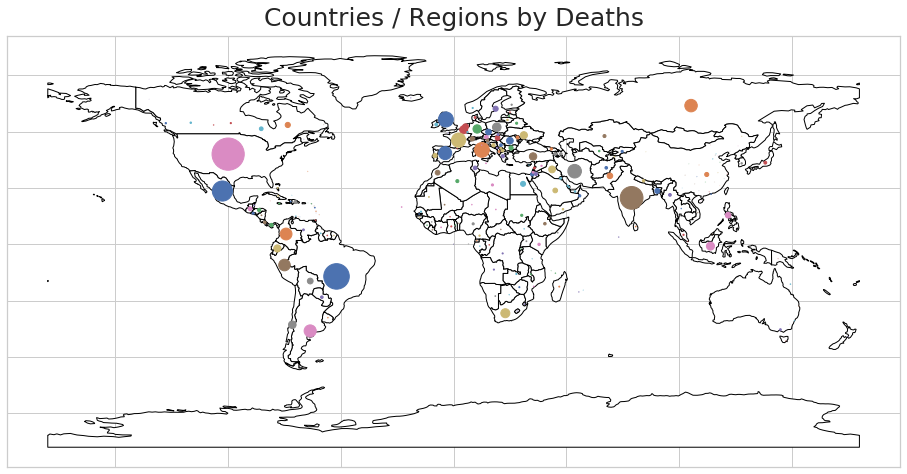

In [56]:
#Using geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(1, figsize=(16,16))

ax = world.plot(ax=ax, color='white', edgecolor='black')

max_cant = len(dfCovid19GlobalDeaths_georeference)

markersize = dfCovid19GlobalDeaths_georeference['Total'] / max_cant
print(type(markersize))


dfCovid19GlobalDeaths_georeference.plot(ax=ax, color=sns.color_palette(None, max_cant), markersize=markersize)

ax.tick_params(
    axis='both', bottom=False, left=False,         
    labelbottom=False, labelleft=False) 

ax.set_title('Countries / Regions by Deaths', fontsize=25, pad=10)

plt.show()

In [57]:
dfCovid19GlobalDeaths_geo_demo = pd.merge(dfCovid19GlobalDeaths_georeference, dfDemograpgics, left_on=  ['Country/Region'],
                   right_on= ['Country Name'], 
                   how = 'inner')

In [58]:
dfCovid19GlobalDeaths_geo_demo.head(3)

,Country/Region,Province/State,Lat,Long,geometry,Total,Country Name,Country Code,Birth rate,Internet users,Income Group
0,Afghanistan,NaN,33.93911,67.709953,POINT (67.70995 33.93911),1864,Afghanistan,AFG,35.253,5.9,Low income
1,Albania,NaN,41.15330,20.168300,POINT (20.16830 41.15330),889,Albania,ALB,12.877,57.2,Upper middle income
2,Algeria,NaN,28.03390,1.659600,POINT (1.65960 28.03390),2501,Algeria,DZA,24.738,16.5,Upper middle income


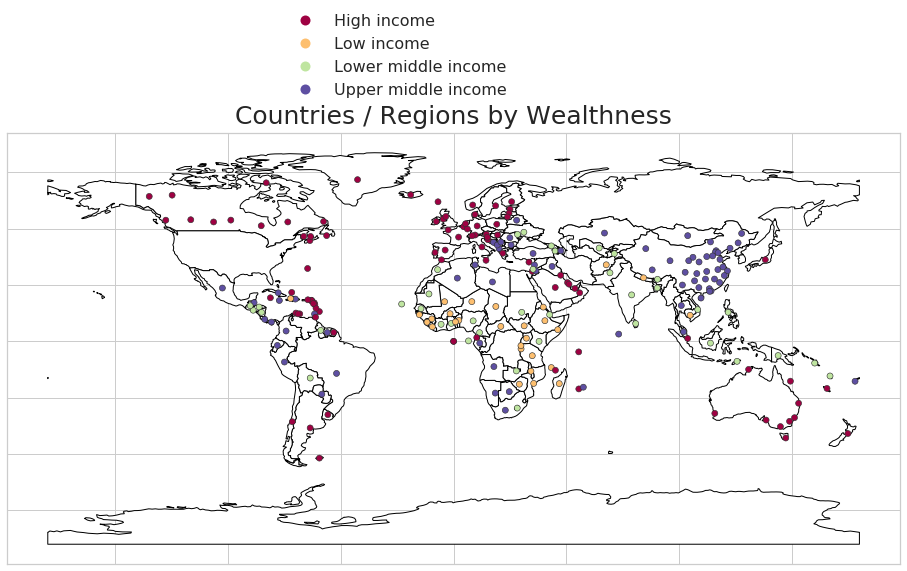

In [59]:
#Using geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(1, figsize=(16,16))

ax = world.plot(ax=ax, color='white', edgecolor='black')

dfCovid19GlobalDeaths_geo_demo.plot(column='Income Group', categorical=True, cmap='Spectral', linewidth=.6, edgecolor='0.2',
         legend=True, legend_kwds={'bbox_to_anchor':(.3, 1.05),'fontsize':16,'frameon':False}, ax=ax)

ax.tick_params(
    axis='both', bottom=False, left=False,         
    labelbottom=False, labelleft=False) 

ax.set_title('Countries / Regions by Wealthness', fontsize=25, pad=10)

plt.show()

In [60]:
dfCovid19GlobalDeathsLast = dfCovid19GlobalDeaths[["Country/Region", "Province/State"]]

In [61]:
#The last columns is the most recent data
#totalDeathList = dfCovid19GlobalDeaths[dfCovid19GlobalDeaths.columns[-1]].to_list()
#dfCovid19GlobalDeaths[dfCovid19GlobalDeaths.columns[-1]]
totalDeathList = dfCovid19GlobalDeaths.iloc[:, -1].copy().to_list()

In [62]:
dfCovid19GlobalDeathsLast['Total'] = totalDeathList

/home/scientist/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [63]:
dfCovid19GlobalDeathsLast.head(3)

,Country/Region,Province/State,Total
0,Afghanistan,NaN,1864
1,Albania,NaN,889
2,Algeria,NaN,2501


In [64]:
dfCovid19GlobalDeathsLast = dfCovid19GlobalDeathsLast.groupby('Country/Region').sum().reset_index()
dfCovid19GlobalDeathsLast.head(3)

,Country/Region,Total
0,Afghanistan,1864
1,Albania,889
2,Algeria,2501


In [65]:
dfCovid19GlobalDeathGeo = pd.merge(dfCovid19GlobalDeathsLast, dfDemograpgics, left_on=  ['Country/Region'],
                   right_on= ['Country Name'], 
                   how = 'inner')

### Testing for Normality

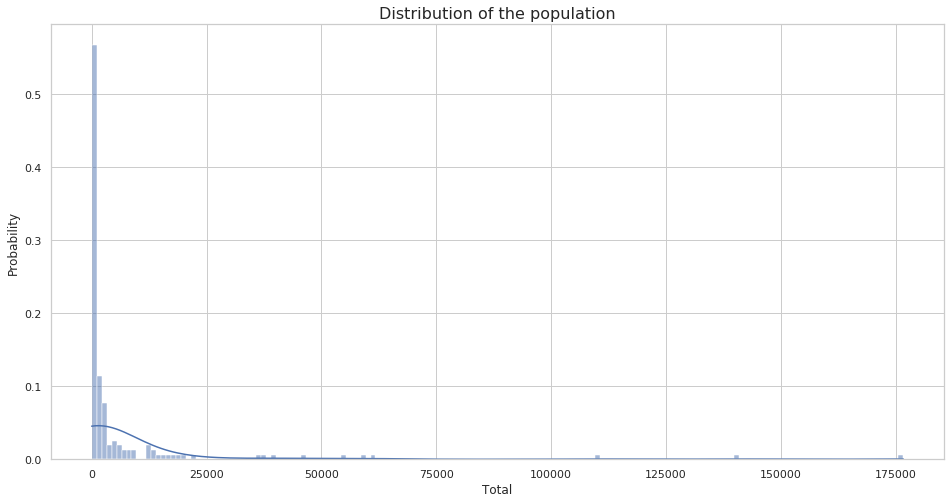

In [66]:
custom_histplot(df = dfCovid19GlobalDeathGeo, p_x = "Total", p_kde = True, p_discrete = False, p_height = 8, p_ax_title = "Distribution of the population")

In [67]:
dfCovid19GlobalDeathGeo_sample = dfCovid19GlobalDeathGeo.sample(frac=0.5, replace=False, random_state=1)
dfCovid19GlobalDeathGeo_sample.shape

(78, 7)

In [68]:
dfCovid19GlobalDeathGeo_sample.head(3)

,Country/Region,Total,Country Name,Country Code,Birth rate,Internet users,Income Group
117,Qatar,239,Qatar,QAT,11.94,85.3000,High income
75,Kazakhstan,2488,Kazakhstan,KAZ,22.73,54.0000,Upper middle income
51,France,55073,France,FRA,12.30,81.9198,High income


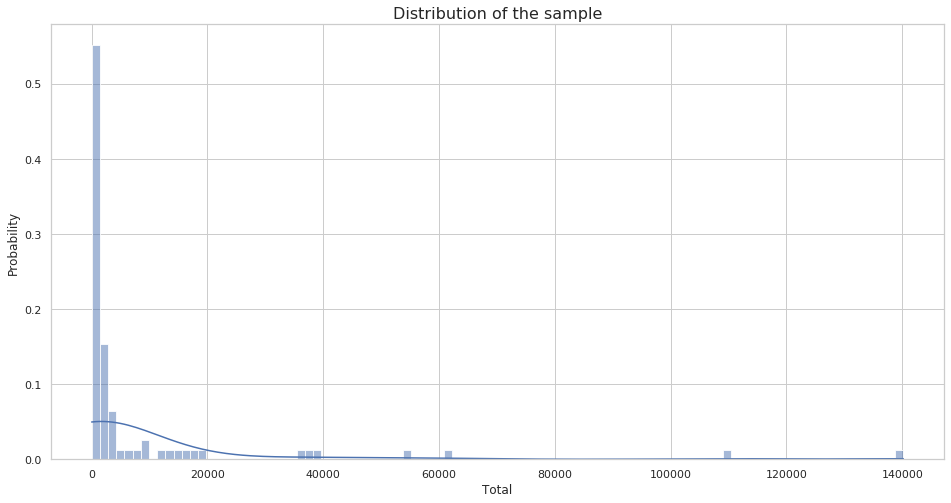

In [69]:
custom_histplot(df = dfCovid19GlobalDeathGeo_sample, p_x = "Total", p_kde = True, p_discrete = False, p_height = 8, p_ax_title = "Distribution of the sample")

#### The Shapiro-Wilk test

In [70]:
#Shapiro-Wilk Test: The Shapiro-Wilk tests if a random sample came from a normal distribution. The null hypothesis of the test is the data is normally distributed.
Ttest_indResult_tuple = sts.shapiro(dfCovid19GlobalDeathGeo_sample["Total"])

In [71]:
#statistic
Ttest_indResult_tuple[0]

0.4181863069534302

In [72]:
#pvalue
Ttest_indResult_tuple[1]

5.190746543903217e-16

In [73]:
ttest_hypothesis_determination(pval = Ttest_indResult_tuple[1], p_alpha = 0.05)

I have enough evidence to reject H0. Therefore, I assume H1 with a confidence of 95.0% and significance of 5.0%


#### Box Plots / QQ Plots

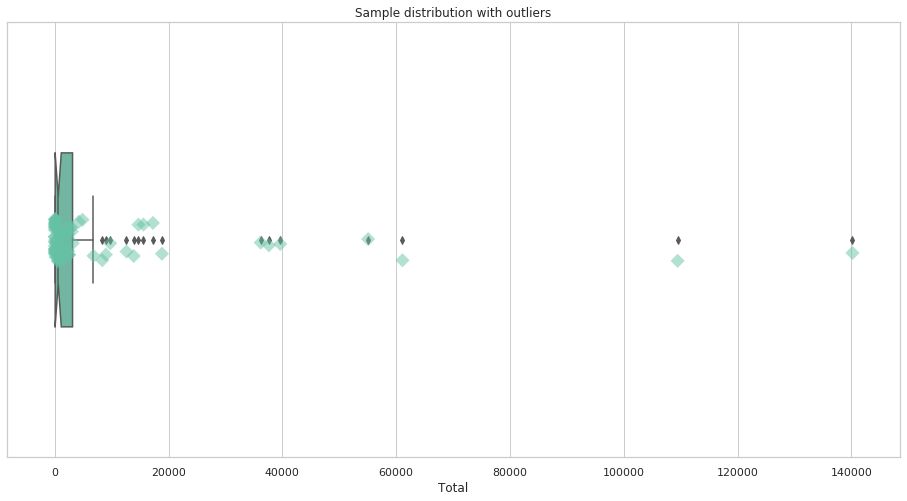

In [75]:
custom_boxplot_stripplot(dfCovid19GlobalDeathGeo_sample, p_x = "Total", p_ax_title = "Sample distribution with outliers")

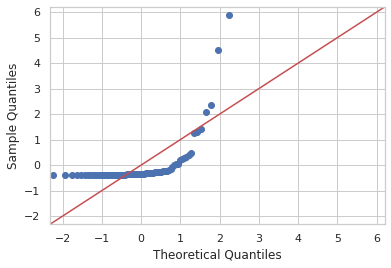

In [76]:
qqplot(dfCovid19GlobalDeathGeo_sample["Total"],  fit = True,line = "45").show()

#### The Kolmogorov-Smirnov test

In [77]:
Ttest_indResult_tuple = sts.kstest(dfCovid19GlobalDeathGeo_sample["Total"], 'norm', args=(dfCovid19GlobalDeathGeo_sample["Total"].mean(), dfCovid19GlobalDeathGeo_sample["Total"].std()))

In [78]:
#statistic
Ttest_indResult_tuple[0]

0.3533965488730332

In [79]:
#pvalue
Ttest_indResult_tuple[1]

3.217879665727802e-09

In [80]:
ttest_hypothesis_determination(pval = Ttest_indResult_tuple[1], p_alpha = 0.05)

I have enough evidence to reject H0. Therefore, I assume H1 with a confidence of 95.0% and significance of 5.0%


### Kruskal-Wallis H-test tests

In [81]:
IncomeGrps = pd.unique(dfCovid19GlobalDeathGeo_sample["Income Group"].values)
IncomeGrps

array(['High income', 'Upper middle income', 'Lower middle income',
       'Low income'], dtype=object)

In [82]:
dfData_f_test = {grp:dfCovid19GlobalDeathGeo_sample['Total'][dfCovid19GlobalDeathGeo_sample["Income Group"] == grp] for grp in IncomeGrps}
#dfData_f_test

In [83]:
#Anova Test
Ttest_indResult_tuple = sts.kruskal(dfData_f_test['Low income'], dfData_f_test['Upper middle income'], 
                    dfData_f_test['High income'], dfData_f_test['Lower middle income'])

In [84]:
#statistic
Ttest_indResult_tuple[0]

10.661756546231032

In [85]:
#pvalue
Ttest_indResult_tuple[1]

0.01370281545454939

In [86]:
ttest_hypothesis_determination(pval = Ttest_indResult_tuple[1], p_alpha = 0.05)

I have enough evidence to reject H0. Therefore, I assume H1 with a confidence of 95.0% and significance of 5.0%


In [87]:
extra_explanation = ("A pvalue close to 0 expresses us that it's highly improbable that in this " 
                     "non normal distribution (chi square) the population median of all of the groups are equal."
                     "But, rejecting the null hypothesis does not indicate which of the groups differs."
                     "One or more sample distributions are not equal."
                    )
print(extra_explanation.format(first_sem_mean,second_sem_mean, Ttest_indResult_tuple[0]))

A pvalue close to 0 expresses us that it's highly improbable that in this non normal distribution (chi square) the population median of all of the groups are equal.But, rejecting the null hypothesis does not indicate which of the groups differs.One or more sample distributions are not equal.


## Third dataset - Hypothesis 3

In [88]:
kaggle_path = "jboysen/mri-and-alzheimers"
kaggle_path_Name = "alzheimers_data_set"
kaggle_zip_file = True
kaggle_dataset_download(kaggle_path, kaggle_path_Name, kaggle_zip_file)

In [89]:
dfAlzheimers = pd.read_csv(r'alzheimers_data_set/oasis_longitudinal.csv')

In [90]:
dfAlzheimers.head(3)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046


### Descriptive analysis

In [99]:
#Checking out nulls: Location is not clean at all!
get_nulls_data(dfAlzheimers)

,Total,PercNotNull
SES,19,94.91
MMSE,2,99.46
ASF,0,100.00
nWBV,0,100.00
eTIV,0,100.00
CDR,0,100.00
EDUC,0,100.00
Age,0,100.00
Hand,0,100.00
M/F,0,100.00


In [105]:
#I decided to create a categorical variable, based on Clinical Dementia Rating
dfAlzheimers['cdr_cat'] = dfAlzheimers.apply (lambda row: get_clinical_dementia_rating(row), axis=1)
dfAlzheimers.head(3)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,cdr_cat
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883,Normal
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876,Normal
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046,Very Mild Dementia


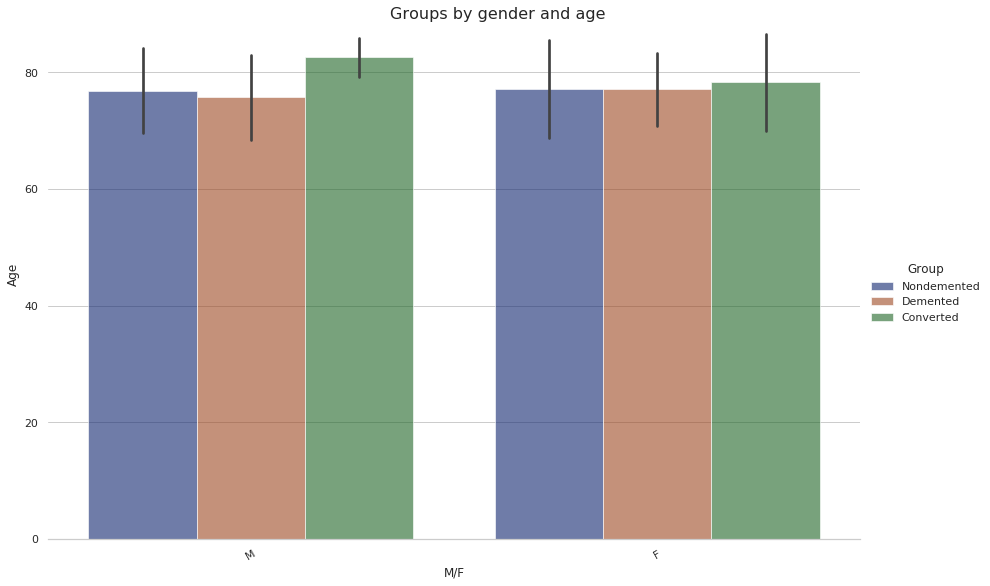

In [97]:
categorical_plot(df=dfAlzheimers, p_kind="bar", p_x="M/F", p_y="Age", 
                 p_hue ="Group", p_ci="sd", p_palette="dark", p_alpha=.6, 
                 p_height=8, p_sub_title = "Groups by gender and age")

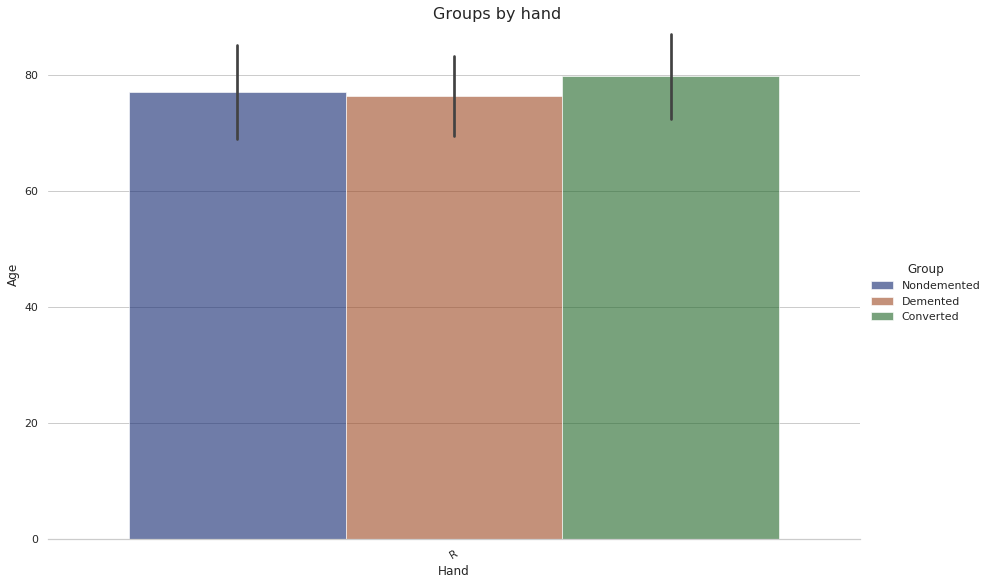

In [100]:
#All the population is right handed so, I decided there is not point to take this column as a variable
categorical_plot(df=dfAlzheimers, p_kind="bar", p_x="Hand", p_y="Age", 
                 p_hue ="Group", p_ci="sd", p_palette="dark", p_alpha=.6, 
                 p_height=8, p_sub_title = "Groups by hand")

Explanation about the CDR rating: 
https://www.sciencedirect.com/topics/medicine-and-dentistry/clinical-dementia-rating

0-Normal,
0.5-Very Mild Dementia,
1-Mild Dementia,
2-Moderate Dementia,
3-5-Severe Dementia

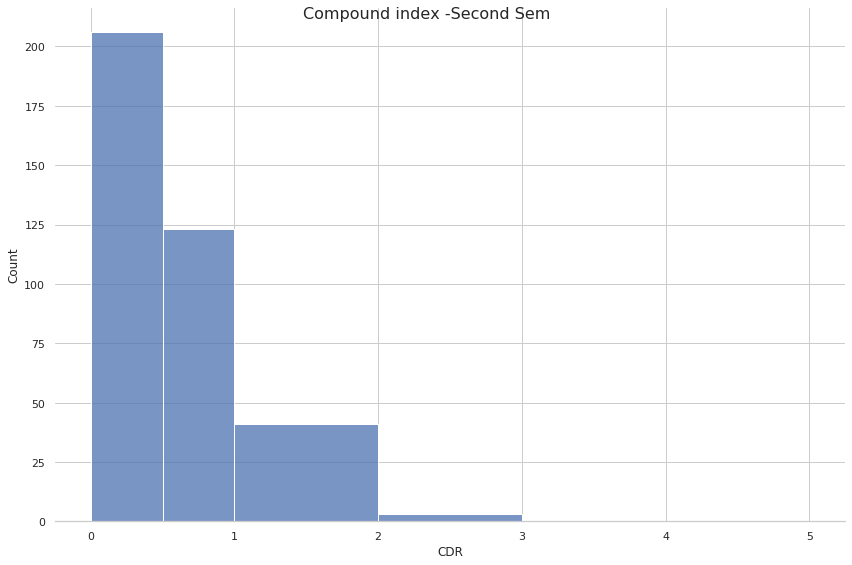

In [101]:
custom_displot(dfAlzheimers, p_x="CDR", p_bins=[0,0.5, 1, 2, 3, 4, 5], p_discrete = True, p_height=8, p_ax_title = "Compound index -Second Sem")

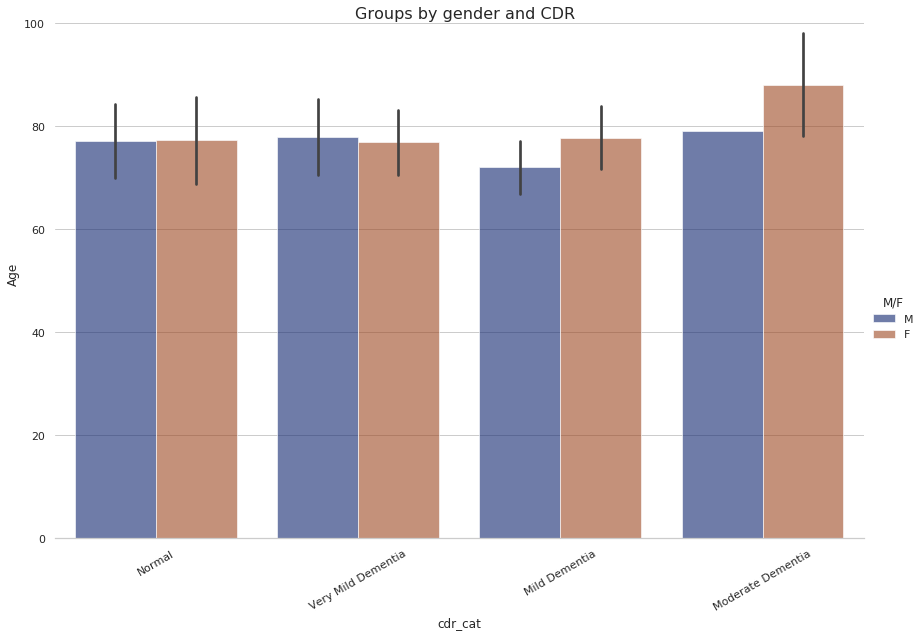

In [108]:
categorical_plot(df=dfAlzheimers, p_kind="bar", p_x="cdr_cat", p_y="Age", 
                 p_hue ="M/F", p_ci="sd", p_palette="dark", p_alpha=.6, 
                 p_height=8, p_sub_title = "Groups by gender and CDR")

### Chi-square test of independence of variables in a contingency table.

In [110]:
dfAlzheimers_sample = dfAlzheimers.sample(frac=0.5, replace=False, random_state=1)
dfAlzheimers_sample.shape

(186, 16)

In [149]:
contingency_table = pd.crosstab(dfAlzheimers_sample["M/F"], dfAlzheimers_sample["cdr_cat"],  margins = False) 

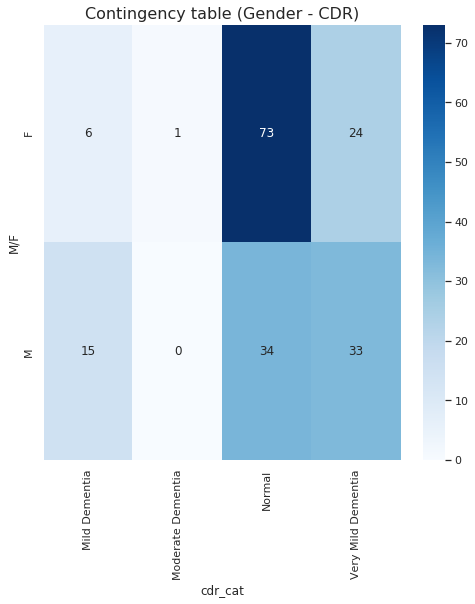

In [158]:
pivot_heatmap(df=contingency_table, p_annot=True, p_cmap="Blues", p_ax_title="Contingency table (Gender - CDR)")

In [137]:
Observed_Values = contingency_table.values
Observed_Values

array([[ 6,  1, 73, 24],
       [15,  0, 34, 33]])

In [138]:
chi2, p_value, dof, ex = sts.chi2_contingency(contingency_table)

In [139]:
#Stablishing hyphotesis parameters (Significance level in this case)
alpha = 0.05

In [145]:
critical_value = sts.chi2.ppf(q=1-alpha,df=dof)
critical_value

7.814727903251179

In [146]:
#Printing what we got so far
print('Significance level: ',alpha)
print('Degree of Freedom: ',dof)
print('chi-square statistic:',chi2)
print('critical_value:',critical_value)
print('p-value:',p_value)

Significance level:  0.05
Degree of Freedom:  3
chi-square statistic: 18.144845640604643
critical_value: 7.814727903251179
p-value: 0.0004106060386043071


In [168]:
chi_square_hypothesis_determination(p_alpha = alpha, p_chi2 = chi2, p_dof = dof, pval = p_value, p_critical_value = critical_value)

Validation_1:

Validating chi2>=critical_value: I have enough evidence to reject H0 (There is a relationship between the categorical variables). Therefore, I assume H1 with a confidence of 95.0%, significance of 5.0%, statistic of 18.144845640604643, degree of freedom of 3, p_value of 0.0004106060386043071 and  crital value of 7.814727903251179.

Validation_2:

Validating pval<=alpha: I have enough evidence to reject H0 (There is a relationship between the categorical variables). Therefore, I assume H1 with a confidence of 95.0%, significance of 5.0%, statistic of 18.144845640604643, degree of freedom of 3, p_value of 0.0004106060386043071 and  crital value of 7.814727903251179.


## linear model

In [169]:
kaggle_path = "kumarajarshi/life-expectancy-who"
kaggle_path_Name = "life_expectancy_who"
kaggle_zip_file = True
kaggle_dataset_download(kaggle_path, kaggle_path_Name, kaggle_zip_file)

In [170]:
dfLifeExpectancyWho = pd.read_csv(r'life_expectancy_who/Life Expectancy Data.csv')

In [171]:
dfLifeExpectancyWho.head(3)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9


### Descriptive analysis

In [172]:
dfLifeExpectancyWho.shape

(2938, 22)

In [177]:
datasetColsExplanation()

('Country --> Country',
 'Year --> Year',
 'Status --> Developed or Developing status',
 'Life expectancy --> Life Expectancy in age',
 'Adult Mortality --> Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)',
 'infant deaths --> Number of Infant Deaths per 1000 population',
 'Alcohol --> Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)',
 'percentage expenditure -- Expenditure on health as a percentage of Gross Domestic Product per capita(%)',
 'Hepatitis B --> Hepatitis B (HepB) immunization coverage among 1-year-olds (%)',
 'Measles --> Measles - number of reported cases per 1000 population',
 'BMI --> Average Body Mass Index of entire population',
 'under-five deaths --> Number of under-five deaths per 1000 population',
 'Polio --> Polio (Pol3) immunization coverage among 1-year-olds (%)',
 'Total expenditure --> General government expenditure on health as a percentage of total government expenditure (%)'

In [181]:
#Renaming the columns, basically eliminating the inter-spaces by adding underscores
dfLifeExpectancyWho = dfLifeExpectancyWho.rename(
    columns={
        " BMI ": "BMI",
        "Life expectancy ": "Life_Expectancy",
        "Adult Mortality": "Adult_Mortality",
        "infant deaths": "Infant_Deaths",
        "percentage expenditure": "Percentage_Exp",
        "Hepatitis B": "HepatitisB",
        "Measles ": "Measles",
        "under-five deaths ": "Under_Five_Deaths",
        "Diphtheria ": "Diphtheria",
        " HIV/AIDS": "HIV/AIDS",
        " thinness  1-19 years": "thinness_1to19_years",
        " thinness 5-9 years": "thinness_5to9_years",
        "Income composition of resources": "Income_Comp_Of_Resources",
        "Total expenditure": "Tot_Exp",
    }
)

In [182]:
dfLifeExpectancyWho.dtypes

Country                      object
Year                          int64
Status                       object
Life_Expectancy             float64
Adult_Mortality             float64
Infant_Deaths                 int64
Alcohol                     float64
Percentage_Exp              float64
HepatitisB                  float64
Measles                       int64
BMI                         float64
Under_Five_Deaths             int64
Polio                       float64
Tot_Exp                     float64
Diphtheria                  float64
HIV/AIDS                    float64
GDP                         float64
Population                  float64
thinness_1to19_years        float64
thinness_5to9_years         float64
Income_Comp_Of_Resources    float64
Schooling                   float64
dtype: object

#### Dealing with nulls

In [184]:
dfLifeExpectancyWho.isnull().sum()

Country                       0
Year                          0
Status                        0
Life_Expectancy              10
Adult_Mortality              10
Infant_Deaths                 0
Alcohol                     194
Percentage_Exp                0
HepatitisB                  553
Measles                       0
BMI                          34
Under_Five_Deaths             0
Polio                        19
Tot_Exp                     226
Diphtheria                   19
HIV/AIDS                      0
GDP                         448
Population                  652
thinness_1to19_years         34
thinness_5to9_years          34
Income_Comp_Of_Resources    167
Schooling                   163
dtype: int64

In [183]:
#Checking out nulls: Location is not clean at all!
get_nulls_data(dfLifeExpectancyWho)

,Total,PercNotNull
Population,652,77.81
HepatitisB,553,81.18
GDP,448,84.75
Tot_Exp,226,92.31
Alcohol,194,93.40
Income_Comp_Of_Resources,167,94.32
Schooling,163,94.45
BMI,34,98.84
thinness_1to19_years,34,98.84
thinness_5to9_years,34,98.84


In [ ]:
# The dataset it is pretty clean, but it needs some data wrangling(munging)

In [196]:
dfLifeExpectancyWhoFix = dfLifeExpectancyWho.copy()

In [197]:
# The good news is the missing value cols are numeric. So, lets calculate the median as a "quick fix"
dfLifeExpectancyWhoFix = fixing_col_nulls(dfLifeExpectancyWhoFix)

In [199]:
#Checking out nulls: now is 100% clean
get_nulls_data(dfLifeExpectancyWhoFix)

,Total,PercNotNull
Schooling,0,100.0
Income_Comp_Of_Resources,0,100.0
Year,0,100.0
Status,0,100.0
Life_Expectancy,0,100.0
Adult_Mortality,0,100.0
Infant_Deaths,0,100.0
Alcohol,0,100.0
Percentage_Exp,0,100.0
HepatitisB,0,100.0


In [195]:
%run Assignment_III_Helper.ipynb
%run Assignment_III_Plot.ipynb